# **<center><font size=6>Wetland degradation identification using supervised and unsupervised classification algorithms based on field measurement data and Landsat imagery</font></center>**

<center><font size=4>Keqi He</font></center>
<center><font size=4>Earth and Ocean Sciences, Nicholas School of the Environment, Duke University, Durham, NC 27708, USA</font></center>

# 1. Download Landsat imagery

In [1]:
%%bash
pip install landsatxplore

In [ ]:
import landsatxplore.api
from landsatxplore.earthexplorer import EarthExplorer

def request_Landsat(username,password,product,lat,lon,start_date,end_date,cloud_max):

    api = landsatxplore.api.API(username, password)

    scenes = api.search(
        dataset=product,
        latitude=lat,
        longitude=lon,
        start_date=start_date,
        end_date=end_date,
        max_cloud_cover=cloud_max)

    print('{} scenes found.'.format(len(scenes)))
    api.logout()
    return scenes

def download_landsat(username,password,Landsat_name,output_dir):

    Earth_Down = EarthExplorer(username, password)

    for scene in Landsat_name:

        ID = scene['entityId']
        print('Downloading data %s '% ID)
        Earth_Down.download(scene_id=ID, output_dir=output_dir)

    Earth_Down.logout()

if __name__ == '__main__':

    username = 'keqi.he@duke.edu'
    password = 'Hkq15705848304'
    product1 = 'LANDSAT_TM_C1'
    product2 = 'LANDSAT_8_C1'
    lat = 35.75
    lon = -75.917
    start_date1='2003-11-01'
    end_date1='2004-02-29'
    start_date2='2016-04-01'
    end_date2='2016-07-31'
    cloud_max = 0
    output_dir = '/home/jovyan/work/Keqi/ESDA_kh/data'
    Landsat_name1 = request_Landsat(username,password,product1,lat,lon,start_date1,end_date1,cloud_max)
    Landsat_name_TM = Landsat_name1[0:5]
    download_landsat(username,password,Landsat_name_TM,output_dir)
    Landsat_name2 = request_Landsat(username,password,product2,lat,lon,start_date2,end_date2,cloud_max)
    Landsat_name_8 = []
    Landsat_name_8.append(Landsat_name2[0])
    Landsat_name_8.append(Landsat_name2[5])
    Landsat_name_8.append(Landsat_name2[6])
    Landsat_name_8.append(Landsat_name2[9])
    download_landsat(username,password,Landsat_name_8,output_dir)

# 2. Landsat imagery pre-processing


## 2.1 Unzip Landsat imagery  

In [10]:
%%bash
#!bin/sh
for file in ./data/*
do
    if test -f $file 
    then
        tar -zxvf $file -C ./data_processing
    fi
done

LC08_L1TP_014035_20160406_20170223_01_T1_B1.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B6.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B8.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B9.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B10.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B11.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_BQA.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_ANG.txt
LC08_L1TP_014035_20160406_20170223_01_T1_MTL.txt
LC08_L1TP_014035_20160524_20170223_01_T1_B1.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B3.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B6.TIF
LC08_L1TP_014035_20160524_20170223_

In [30]:
%%bash
cd ./data_processing
ls *.TIF

LC08_L1TP_014035_20160406_20170223_01_T1_B10.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B11.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B1.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B6.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B8.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_B9.TIF
LC08_L1TP_014035_20160406_20170223_01_T1_BQA.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B10.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B11.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B1.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B3.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF
LC08_L1TP_014035_20160524_20170223_01_T1_B6.TIF
LC08_L1TP_014035_20160524_20170223_

## 2.2 Extract the study area from the Landsat imagery 

Spatial resolution: 30 meters  
Projection: WGS_1984 (EPSG:4326)

In [160]:
%%bash
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF ./extract/LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF ./extract/LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF ./extract/LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF ./extract/LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF ./extract/LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF ./extract/LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160524_20170223_01_T1_B3.TIF ./extract/LC08_L1TP_014035_20160524_20170223_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF ./extract/LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF ./extract/LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160524_20170223_01_T1_B7.TIF ./extract/LC08_L1TP_014035_20160524_20170223_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160609_20180130_01_T1_B2.TIF ./extract/LC08_L1TP_014035_20160609_20180130_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160609_20180130_01_T1_B3.TIF ./extract/LC08_L1TP_014035_20160609_20180130_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160609_20180130_01_T1_B4.TIF ./extract/LC08_L1TP_014035_20160609_20180130_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF ./extract/LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160609_20180130_01_T1_B7.TIF ./extract/LC08_L1TP_014035_20160609_20180130_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160727_20170222_01_T1_B2.TIF ./extract/LC08_L1TP_014035_20160727_20170222_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160727_20170222_01_T1_B3.TIF ./extract/LC08_L1TP_014035_20160727_20170222_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160727_20170222_01_T1_B4.TIF ./extract/LC08_L1TP_014035_20160727_20170222_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF ./extract/LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LC08_L1TP_014035_20160727_20170222_01_T1_B7.TIF ./extract/LC08_L1TP_014035_20160727_20170222_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031113_20160914_01_T1_B1.TIF ./extract/LT05_L1TP_014035_20031113_20160914_01_T1_B1.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031113_20160914_01_T1_B2.TIF ./extract/LT05_L1TP_014035_20031113_20160914_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031113_20160914_01_T1_B3.TIF ./extract/LT05_L1TP_014035_20031113_20160914_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF ./extract/LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031113_20160914_01_T1_B7.TIF ./extract/LT05_L1TP_014035_20031113_20160914_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031129_20160914_01_T1_B1.TIF ./extract/LT05_L1TP_014035_20031129_20160914_01_T1_B1.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031129_20160914_01_T1_B2.TIF ./extract/LT05_L1TP_014035_20031129_20160914_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031129_20160914_01_T1_B3.TIF ./extract/LT05_L1TP_014035_20031129_20160914_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF ./extract/LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031129_20160914_01_T1_B7.TIF ./extract/LT05_L1TP_014035_20031129_20160914_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031215_20160914_01_T1_B1.TIF ./extract/LT05_L1TP_014035_20031215_20160914_01_T1_B1.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031215_20160914_01_T1_B2.TIF ./extract/LT05_L1TP_014035_20031215_20160914_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031215_20160914_01_T1_B3.TIF ./extract/LT05_L1TP_014035_20031215_20160914_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF ./extract/LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031215_20160914_01_T1_B7.TIF ./extract/LT05_L1TP_014035_20031215_20160914_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031231_20160914_01_T1_B1.TIF ./extract/LT05_L1TP_014035_20031231_20160914_01_T1_B1.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031231_20160914_01_T1_B2.TIF ./extract/LT05_L1TP_014035_20031231_20160914_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031231_20160914_01_T1_B3.TIF ./extract/LT05_L1TP_014035_20031231_20160914_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF ./extract/LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20031231_20160914_01_T1_B7.TIF ./extract/LT05_L1TP_014035_20031231_20160914_01_T1_B7.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20040116_20160914_01_T1_B1.TIF ./extract/LT05_L1TP_014035_20040116_20160914_01_T1_B1.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20040116_20160914_01_T1_B2.TIF ./extract/LT05_L1TP_014035_20040116_20160914_01_T1_B2.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20040116_20160914_01_T1_B3.TIF ./extract/LT05_L1TP_014035_20040116_20160914_01_T1_B3.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF ./extract/LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF
gdalwarp -overwrite -r average -te -76.167 35.50 -75.667 36.00 -t_srs EPSG:4326 -tr 0.0002693965517 0.0002693965517 ./data_processing/LT05_L1TP_014035_20040116_20160914_01_T1_B7.TIF ./extract/LT05_L1TP_014035_20040116_20160914_01_T1_B7.TIF

Creating output file that is 1856P x 1856L.
Processing ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 1856P x 1856L.
Processing ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 1856P x 1856L.
Processing ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 1856P x 1856L.
Processing ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 1856P x 1856L.
Processing ./data_processing/LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 1856P x 1856L.
Proces

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_creat

## 2.3 Calculate Top-of-atmosphere (TOA) reflectance

Convert reflective band pixel values (DN) to TOA reflectance:

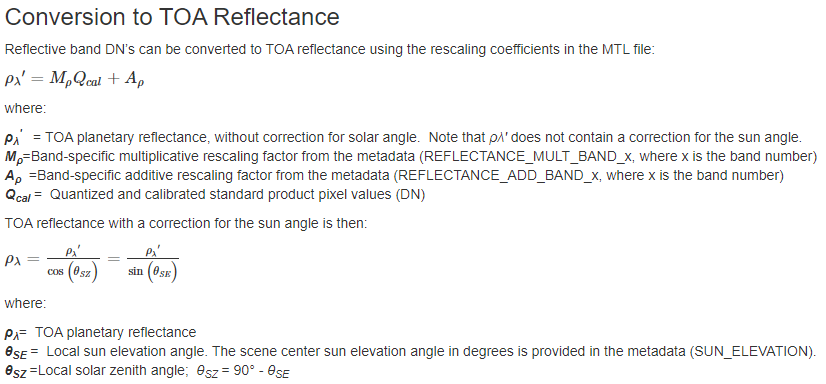

from: https://www.usgs.gov/core-science-systems/nli/landsat/using-usgs-landsat-level-1-data-product

In [17]:
data_blue_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B1.TIF',
              'LT05_L1TP_014035_20031129_20160914_01_T1_B1.TIF',
              'LT05_L1TP_014035_20031215_20160914_01_T1_B1.TIF',
              'LT05_L1TP_014035_20031231_20160914_01_T1_B1.TIF',
              'LT05_L1TP_014035_20040116_20160914_01_T1_B1.TIF']
data_green_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B2.TIF',
               'LT05_L1TP_014035_20031129_20160914_01_T1_B2.TIF',
               'LT05_L1TP_014035_20031215_20160914_01_T1_B2.TIF',
               'LT05_L1TP_014035_20031231_20160914_01_T1_B2.TIF',
               'LT05_L1TP_014035_20040116_20160914_01_T1_B2.TIF']
data_red_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B3.TIF',
             'LT05_L1TP_014035_20031129_20160914_01_T1_B3.TIF',
             'LT05_L1TP_014035_20031215_20160914_01_T1_B3.TIF',
             'LT05_L1TP_014035_20031231_20160914_01_T1_B3.TIF',
             'LT05_L1TP_014035_20040116_20160914_01_T1_B3.TIF']
data_nir_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF',
             'LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF',
             'LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF',
             'LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF',
             'LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF']
data_swir_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B7.TIF',
               'LT05_L1TP_014035_20031129_20160914_01_T1_B7.TIF',
               'LT05_L1TP_014035_20031215_20160914_01_T1_B7.TIF',
               'LT05_L1TP_014035_20031231_20160914_01_T1_B7.TIF',
               'LT05_L1TP_014035_20040116_20160914_01_T1_B7.TIF']
data_blue_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF',
              'LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF',
              'LC08_L1TP_014035_20160609_20180130_01_T1_B2.TIF',
              'LC08_L1TP_014035_20160727_20170222_01_T1_B2.TIF']
data_green_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF',
               'LC08_L1TP_014035_20160524_20170223_01_T1_B3.TIF',
               'LC08_L1TP_014035_20160609_20180130_01_T1_B3.TIF',
               'LC08_L1TP_014035_20160727_20170222_01_T1_B3.TIF']
data_red_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF',
             'LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF',
             'LC08_L1TP_014035_20160609_20180130_01_T1_B4.TIF',
             'LC08_L1TP_014035_20160727_20170222_01_T1_B4.TIF']
data_nir_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF',
             'LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF',
             'LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF',
             'LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF']
data_swir_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF',
               'LC08_L1TP_014035_20160524_20170223_01_T1_B7.TIF',
               'LC08_L1TP_014035_20160609_20180130_01_T1_B7.TIF',
               'LC08_L1TP_014035_20160727_20170222_01_T1_B7.TIF']

In [18]:
Mp_blue_5 = [0.001212,0.0012042,0.0011989,0.0011967,0.0011976]
Mp_green_5 = [0.0025329,0.0025166,0.0025056,0.0025009,0.0025028]
Mp_red_5 = [0.0021556,0.0021417,0.0021324,0.0021284,0.00213]
Mp_nir_5 = [0.002609,0.0025922,0.0025809,0.0025761,0.002578]
Mp_swir_5 = [0.0024522,0.0024364,0.0024258,0.0024212,0.0024231]
Ap_blue_5 = [-0.003617,-0.003594,-0.003579,-0.003572,-0.003575]
Ap_green_5 = [-0.0075,-0.007452,-0.007419,-0.007405,-0.007411]
Ap_red_5 = [-0.004571,-0.004542,-0.004522,-0.004514,-0.004517]
Ap_nir_5 = [-0.007106,-0.00706,-0.00703,-0.007016,-0.007022]
Ap_swir_5 = [-0.008063,-0.008012,-0.007977,-0.007962,-0.007968]
sun_5 = [31.96287911,28.36171186,26.12895949,25.58250783,26.86206103]
Mp_8 = 0.00002
Ap_8 = -0.1
sun_8 = [54.69624371,66.75129142,67.75778446,63.87201734]

In [19]:
import rasterio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def toa(file,Mp,Ap,sun):
    data = rasterio.open('./extract/' + file).read(1)
    data_toa = np.zeros(shape=(data.shape[0], data.shape[1]))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if (Mp * data[i,j] + Ap) < 0:
                data_toa[i,j] = 0
            else:
                data_toa[i,j] = (Mp * data[i,j] + Ap) / np.sin(sun / 180 * np.pi)
    np.save('./variables/' + file + '.npy',data_toa)
for i in range(5):
    toa(data_blue_5[i],Mp_blue_5[i],Ap_blue_5[i],sun_5[i])
    toa(data_green_5[i],Mp_green_5[i],Ap_green_5[i],sun_5[i])
    toa(data_red_5[i],Mp_red_5[i],Ap_red_5[i],sun_5[i])
    toa(data_nir_5[i],Mp_nir_5[i],Ap_nir_5[i],sun_5[i])
    toa(data_swir_5[i],Mp_swir_5[i],Ap_swir_5[i],sun_5[i])
for i in range(4):
    toa(data_blue_8[i],Mp_8,Ap_8,sun_8[i])
    toa(data_green_8[i],Mp_8,Ap_8,sun_8[i])
    toa(data_red_8[i],Mp_8,Ap_8,sun_8[i])
    toa(data_nir_8[i],Mp_8,Ap_8,sun_8[i])
    toa(data_swir_8[i],Mp_8,Ap_8,sun_8[i])

## 2.4 Calculate Normalized difference vegetation index (NDVI)

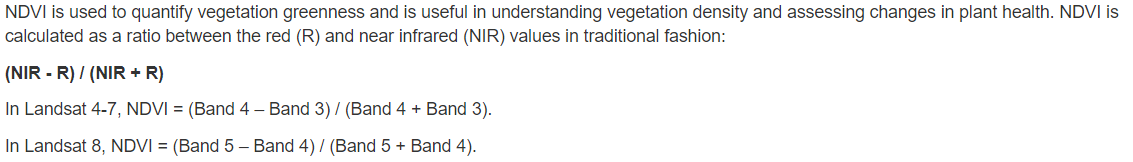

from: https://www.usgs.gov/core-science-systems/nli/landsat/landsat-normalized-difference-vegetation-index?qt-science_support_page_related_con=0#qt-science_support_page_related_con

In [20]:
data_ndvi_5_1 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031113_20160914_01_T1_B3.TIF']
data_ndvi_5_2 = ['LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031129_20160914_01_T1_B3.TIF']
data_ndvi_5_3 = ['LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031215_20160914_01_T1_B3.TIF']
data_ndvi_5_4 = ['LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031231_20160914_01_T1_B3.TIF']
data_ndvi_5_5 = ['LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20040116_20160914_01_T1_B3.TIF']
data_ndvi_8_1 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF','LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF']
data_ndvi_8_2 = ['LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF','LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF']
data_ndvi_8_3 = ['LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF','LC08_L1TP_014035_20160609_20180130_01_T1_B4.TIF']
data_ndvi_8_4 = ['LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF','LC08_L1TP_014035_20160727_20170222_01_T1_B4.TIF']

In [21]:
def ndvi_cal(files):
    nir = np.load('./variables/' + files[0] + '.npy')
    red = np.load('./variables/' + files[1] + '.npy')
    ndvi = np.zeros(shape=(nir.shape[0], nir.shape[1]))
    for i in range(nir.shape[0]):
        for j in range(nir.shape[1]):
            ndvi[i,j] = (nir[i,j] - red[i,j])/(nir[i,j] + red[i,j])
    np.save('./variables/' + files[0] + '_ndvi.npy',ndvi)
ndvi_cal(data_ndvi_5_1)
ndvi_cal(data_ndvi_5_2)
ndvi_cal(data_ndvi_5_3)
ndvi_cal(data_ndvi_5_4)
ndvi_cal(data_ndvi_5_5)
ndvi_cal(data_ndvi_8_1)
ndvi_cal(data_ndvi_8_2)
ndvi_cal(data_ndvi_8_3)
ndvi_cal(data_ndvi_8_4)

## 2.5 Calculate Enhanced difference vegetation index (EVI)

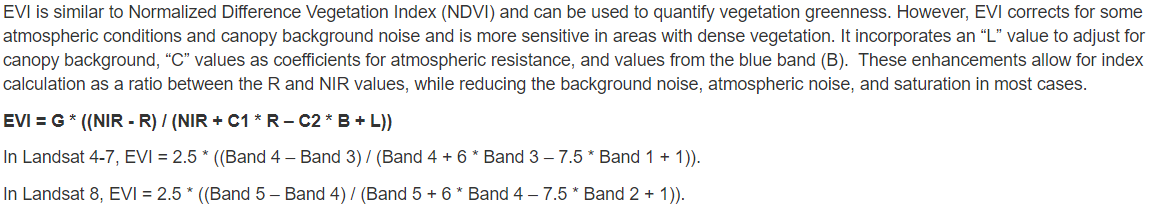

from: https://www.usgs.gov/core-science-systems/nli/landsat/landsat-enhanced-vegetation-index?qt-science_support_page_related_con=0#qt-science_support_page_related_con

In [2]:
data_evi_5_1 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031113_20160914_01_T1_B3.TIF','LT05_L1TP_014035_20031113_20160914_01_T1_B1.TIF']
data_evi_5_2 = ['LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031129_20160914_01_T1_B3.TIF','LT05_L1TP_014035_20031129_20160914_01_T1_B1.TIF']
data_evi_5_3 = ['LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031215_20160914_01_T1_B3.TIF','LT05_L1TP_014035_20031215_20160914_01_T1_B1.TIF']
data_evi_5_4 = ['LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20031231_20160914_01_T1_B3.TIF','LT05_L1TP_014035_20031231_20160914_01_T1_B1.TIF']
data_evi_5_5 = ['LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF','LT05_L1TP_014035_20040116_20160914_01_T1_B3.TIF','LT05_L1TP_014035_20040116_20160914_01_T1_B1.TIF']
data_evi_8_1 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF','LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF','LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF']
data_evi_8_2 = ['LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF','LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF','LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF']
data_evi_8_3 = ['LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF','LC08_L1TP_014035_20160609_20180130_01_T1_B4.TIF','LC08_L1TP_014035_20160609_20180130_01_T1_B2.TIF']
data_evi_8_4 = ['LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF','LC08_L1TP_014035_20160727_20170222_01_T1_B4.TIF','LC08_L1TP_014035_20160727_20170222_01_T1_B2.TIF']

In [4]:
def evi_cal(files):
    nir = np.load('./variables/' + files[0] + '.npy')
    red = np.load('./variables/' + files[1] + '.npy')
    blue = np.load('./variables/' + files[2] + '.npy')
    evi = np.zeros(shape=(nir.shape[0], nir.shape[1]))
    for i in range(nir.shape[0]):
        for j in range(nir.shape[1]):
            evivalue = 2.5 * (nir[i,j] - red[i,j])/(nir[i,j] + 6 * red[i,j] - 7.5 * blue[i,j] + 1)
            if evivalue > 1:
                evi[i,j] = 1
            elif evivalue < -1:
                evi[i,j] = -1
            else:
                evi[i,j] = evivalue
    np.save('./variables/' + files[0] + '_evi.npy',evi)
evi_cal(data_evi_5_1)
evi_cal(data_evi_5_2)
evi_cal(data_evi_5_3)
evi_cal(data_evi_5_4)
evi_cal(data_evi_5_5)
evi_cal(data_evi_8_1)
evi_cal(data_evi_8_2)
evi_cal(data_evi_8_3)
evi_cal(data_evi_8_4)

## 2.6 Calculate the indices used in the supervised and unsupervised classification algorithms

 Indices used in the supervised and unsupervised classification algorithms, derived from Landsat imagery includes:

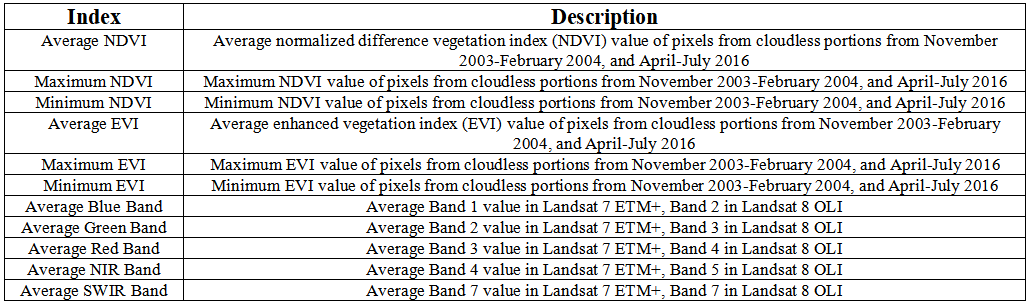

In [5]:
import math
blue_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B1.TIF.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B1.TIF.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B1.TIF.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B1.TIF.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B1.TIF.npy']
green_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B2.TIF.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B2.TIF.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B2.TIF.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B2.TIF.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B2.TIF.npy']
red_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B3.TIF.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B3.TIF.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B3.TIF.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B3.TIF.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B3.TIF.npy']
nir_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF.npy']
swir_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B7.TIF.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B7.TIF.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B7.TIF.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B7.TIF.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B7.TIF.npy']
blue_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B2.TIF.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B2.TIF.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B2.TIF.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B2.TIF.npy']
green_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B3.TIF.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B3.TIF.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B3.TIF.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B3.TIF.npy']
red_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B4.TIF.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B4.TIF.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B4.TIF.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B4.TIF.npy']
nir_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF.npy']
swir_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B7.TIF.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B7.TIF.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B7.TIF.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B7.TIF.npy']
ndvi_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF_ndvi.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF_ndvi.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF_ndvi.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF_ndvi.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF_ndvi.npy']
evi_5 = ['LT05_L1TP_014035_20031113_20160914_01_T1_B4.TIF_evi.npy',
        'LT05_L1TP_014035_20031129_20160914_01_T1_B4.TIF_evi.npy',
        'LT05_L1TP_014035_20031215_20160914_01_T1_B4.TIF_evi.npy',
        'LT05_L1TP_014035_20031231_20160914_01_T1_B4.TIF_evi.npy',
        'LT05_L1TP_014035_20040116_20160914_01_T1_B4.TIF_evi.npy']
ndvi_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF_ndvi.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF_ndvi.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF_ndvi.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF_ndvi.npy']
evi_8 = ['LC08_L1TP_014035_20160406_20170223_01_T1_B5.TIF_evi.npy',
        'LC08_L1TP_014035_20160524_20170223_01_T1_B5.TIF_evi.npy',
        'LC08_L1TP_014035_20160609_20180130_01_T1_B5.TIF_evi.npy',
        'LC08_L1TP_014035_20160727_20170222_01_T1_B5.TIF_evi.npy']

In [6]:
def aver(files,band):
    a = np.load('./variables/' + files[0])
    sums = np.zeros(shape=(a.shape[0], a.shape[1]))
    num = np.zeros(shape=(a.shape[0], a.shape[1]))
    for file in files:
        vari = np.load('./variables/' + file)
        for i in range(sums.shape[0]):
            for j in range(sums.shape[1]):
                sums[i,j] = sums[i,j] + vari[i,j]
                num[i,j] = num[i,j] + 1
    np.save('./variables/averages/' + band + '.npy',sums/num)
aver(blue_5,'blue_5')
aver(green_5,'green_5')
aver(red_5,'red_5')
aver(nir_5,'nir_5')
aver(swir_5,'swir_5')
aver(ndvi_5,'ndvi_5')
aver(evi_5,'evi_5')
aver(blue_8,'blue_8')
aver(green_8,'green_8')
aver(red_8,'red_8')
aver(nir_8,'nir_8')
aver(swir_8,'swir_8')
aver(ndvi_8,'ndvi_8')
aver(evi_8,'evi_8')

In [7]:
def max_vi(files, band):
    a = np.load('./variables/' + files[0])
    maxs = np.zeros(shape=(a.shape[0], a.shape[1])) - 9999
    for file in files:
        vari = np.load('./variables/' + file)
        for i in range(maxs.shape[0]):
            for j in range(maxs.shape[1]):
                if ~math.isnan(vari[i,j]): 
                    if vari[i,j] > maxs[i,j]:
                        maxs[i,j] = vari[i,j]
    np.save('./variables/maxs/' + band + '.npy',maxs)
max_vi(ndvi_5,'ndvi_5')
max_vi(evi_5,'evi_5')
max_vi(ndvi_8,'ndvi_8')
max_vi(evi_8,'evi_8')

In [8]:
import numpy as np
def min_vi(files, band):
    a = np.load('./variables/' + files[0])
    mins = np.zeros(shape=(a.shape[0], a.shape[1])) + 9999
    for file in files:
        vari = np.load('./variables/' + file)
        for i in range(mins.shape[0]):
            for j in range(mins.shape[1]):
                if ~math.isnan(vari[i,j]): 
                    if vari[i,j] < mins[i,j]:
                        mins[i,j] = vari[i,j]
    np.save('./variables/mins/' + band + '.npy',mins)
min_vi(ndvi_5,'ndvi_5')
min_vi(evi_5,'evi_5')
min_vi(ndvi_8,'ndvi_8')
min_vi(evi_8,'evi_8')

Summary of indices:

In [1]:
import numpy as np
data1 = {}
data2 = {}
data1['avgNDVI_5'] = np.load('./variables/averages/' + 'ndvi_5.npy')
data1['maxNDVI_5'] = np.load('./variables/maxs/' + 'ndvi_5.npy')
data1['minNDVI_5'] = np.load('./variables/mins/' + 'ndvi_5.npy')
data1['avgEVI_5'] = np.load('./variables/averages/' + 'evi_5.npy')
data1['maxEVI_5'] = np.load('./variables/maxs/' + 'evi_5.npy')
data1['minEVI_5'] = np.load('./variables/mins/' + 'evi_5.npy')
data1['blue_5'] = np.load('./variables/averages/' + 'blue_5.npy')
data1['green_5'] = np.load('./variables/averages/' + 'green_5.npy')
data1['red_5'] = np.load('./variables/averages/' + 'red_5.npy')
data1['nir_5'] = np.load('./variables/averages/' + 'nir_5.npy')
data1['swir_5'] = np.load('./variables/averages/' + 'swir_5.npy')
data2['avgNDVI_8'] = np.load('./variables/averages/' + 'ndvi_8.npy')
data2['maxNDVI_8'] = np.load('./variables/maxs/' + 'ndvi_8.npy')
data2['minNDVI_8'] = np.load('./variables/mins/' + 'ndvi_8.npy')
data2['avgEVI_8'] = np.load('./variables/averages/' + 'evi_8.npy')
data2['maxEVI_8'] = np.load('./variables/maxs/' + 'evi_8.npy')
data2['minEVI_8'] = np.load('./variables/mins/' + 'evi_8.npy')
data2['blue_8'] = np.load('./variables/averages/' + 'blue_8.npy')
data2['green_8'] = np.load('./variables/averages/' + 'green_8.npy')
data2['red_8'] = np.load('./variables/averages/' + 'red_8.npy')
data2['nir_8'] = np.load('./variables/averages/' + 'nir_8.npy')
data2['swir_8'] = np.load('./variables/averages/' + 'swir_8.npy')

November 2003-February 2004 Landsat data for 2003/2004 model

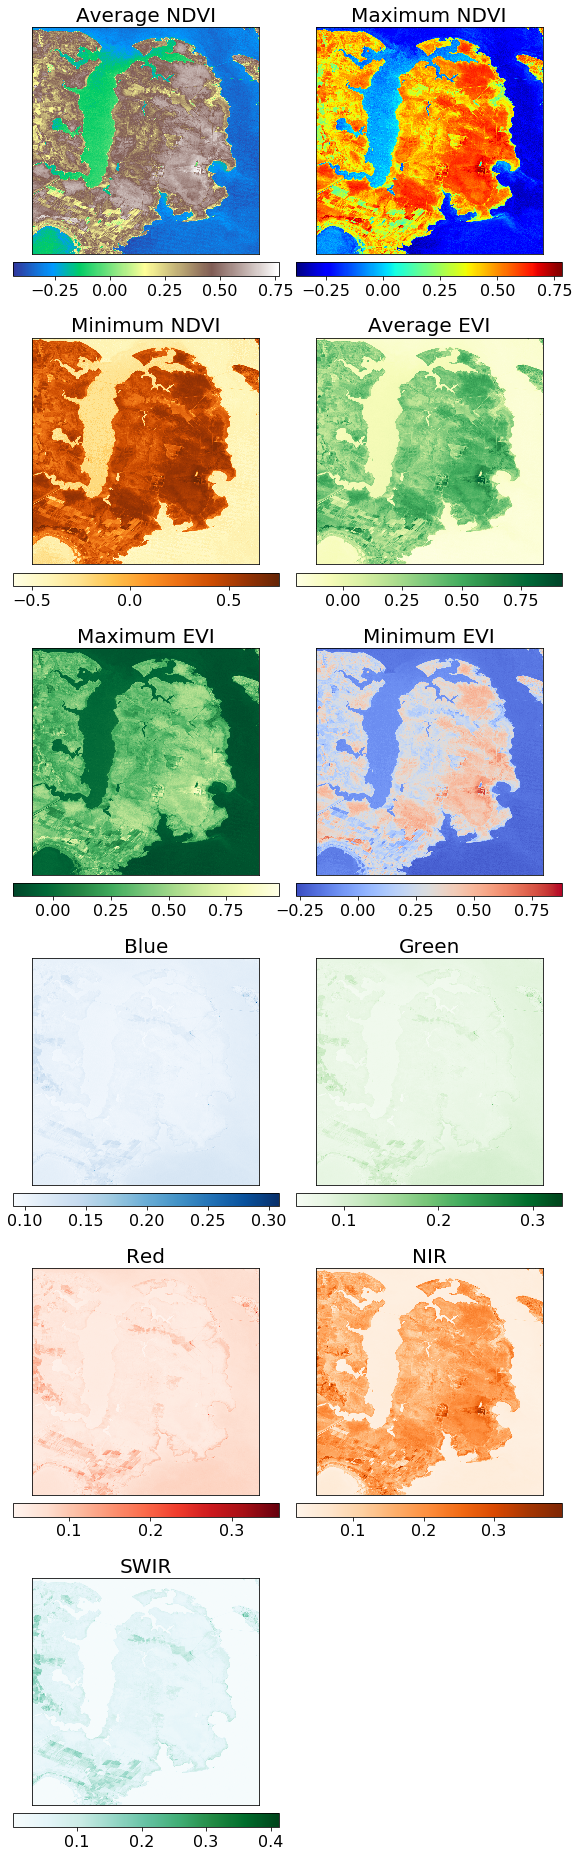

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
info1 = {'avgNDVI_5':{'cmap':'terrain','title':'Average NDVI'},
        'maxNDVI_5':{'cmap':'jet','title':'Maximum NDVI'},
        'minNDVI_5':{'cmap':'YlOrBr','title':'Minimum NDVI'},
        'avgEVI_5':{'cmap':'YlGn','title':'Average EVI'},
        'maxEVI_5':{'cmap':'YlGn_r','title':'Maximum EVI'},
        'minEVI_5':{'cmap':'coolwarm','title':'Minimum EVI'},
        'blue_5':{'cmap':'Blues','title':'Blue'},
        'green_5':{'cmap':'Greens','title':'Green'},
        'red_5':{'cmap':'Reds','title':'Red'},
        'nir_5':{'cmap':'Oranges','title':'NIR'},
        'swir_5':{'cmap':'BuGn','title':'SWIR'}}
plt.figure(figsize=(8,26))
i = 0
for var in data1:
    i += 1
    plt.subplot(6,2,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data1[var],cmap=plt.get_cmap(info1[var]['cmap']))
    cb = plt.colorbar(orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=16)
    plt.title(info1[var]['title'],fontsize=20)
plt.tight_layout()
plt.show()

April-July 2016 Landsat data for 2016 models

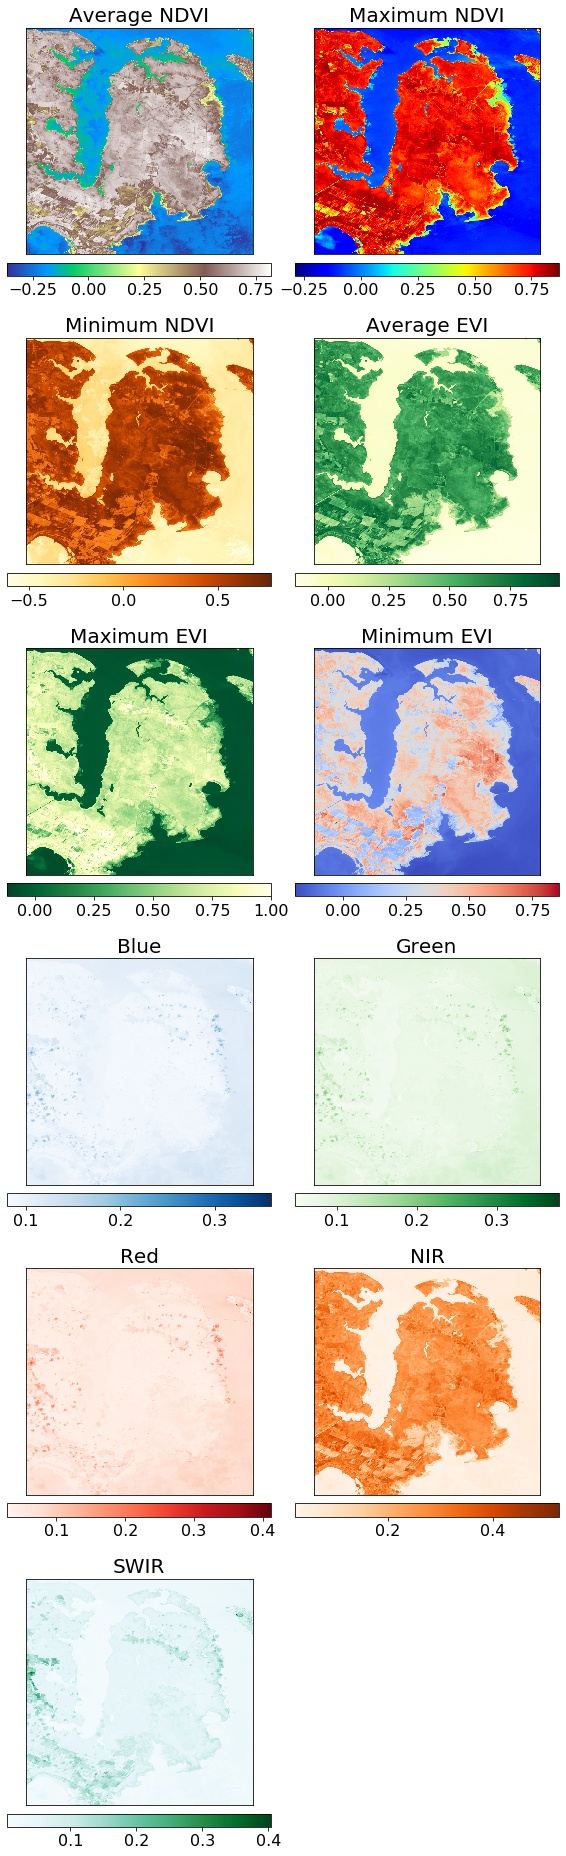

In [12]:
info2 = {'avgNDVI_8':{'cmap':'terrain','title':'Average NDVI'},
        'maxNDVI_8':{'cmap':'jet','title':'Maximum NDVI'},
        'minNDVI_8':{'cmap':'YlOrBr','title':'Minimum NDVI'},
        'avgEVI_8':{'cmap':'YlGn','title':'Average EVI'},
        'maxEVI_8':{'cmap':'YlGn_r','title':'Maximum EVI'},
        'minEVI_8':{'cmap':'coolwarm','title':'Minimum EVI'},
        'blue_8':{'cmap':'Blues','title':'Blue'},
        'green_8':{'cmap':'Greens','title':'Green'},
        'red_8':{'cmap':'Reds','title':'Red'},
        'nir_8':{'cmap':'Oranges','title':'NIR'},
        'swir_8':{'cmap':'BuGn','title':'SWIR'}}
plt.figure(figsize=(8,26))
i = 0
for var in data2:
    i += 1
    plt.subplot(6,2,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data2[var],cmap=plt.get_cmap(info2[var]['cmap']))
    cb = plt.colorbar(orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=16)
    plt.title(info2[var]['title'],fontsize=20)
plt.tight_layout()
plt.show()

# 3. Measurement data from Taillie et al. (2019)

Downloaded from https://doi.pangaea.de/10.1594/PANGAEA.896941

In [2]:
# Measurement data
import xlrd
file = './plot.xlsx'
wb = xlrd.open_workbook(filename=file)
sheet1 = wb.sheet_by_index(0)
lon = sheet1.col_values(0)
lat = sheet1.col_values(1)
# 1 - Forest; 2 - Transitional Forest; 3 - Marsh; 4 - Water Body
veg = sheet1.col_values(2)
lon0 = -76.16666667
lat0 = 35.5
step = 0.0002693965517
column = []
row = []
for i in range(len(lon)):
    column.append(int((lon[i] - lon0) / step))
    row.append(1855 - int((lat[i] - lat0) / step))

# 4. Run the unsupervised classification algorithm (k-means) and map the vegetation classes

## 4.1 Vegetation classifications in 2003/2004 (k-means)

### 4.1.1 Run k-means on the November 2003-February 2004 Landsat data

In [4]:
Xval1 = []
vars1 = ['avgNDVI_5','maxNDVI_5','minNDVI_5','avgEVI_5','maxEVI_5','minEVI_5','blue_5',
        'green_5','red_5','nir_5','swir_5']
for var in vars1:
    tmp = data1[var].reshape(data1[var].size)
    Xval1.append(tmp)
Xval1 = np.array(Xval1).T

In [5]:
# Unsupervised classification - K-mean
# n_clusters = 4
import sklearn.mixture
k = 4
model = sklearn.cluster.KMeans(n_clusters=k)
#Fit the model
#Subsample data to fit the model (minimize computation)
idx1 = np.random.choice(np.arange(Xval1.shape[0]),1000000)
Xns1 = Xval1[idx1,:]
model.fit(Xns1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 4.1.2 Make the vegetation classifications in 2003/2004

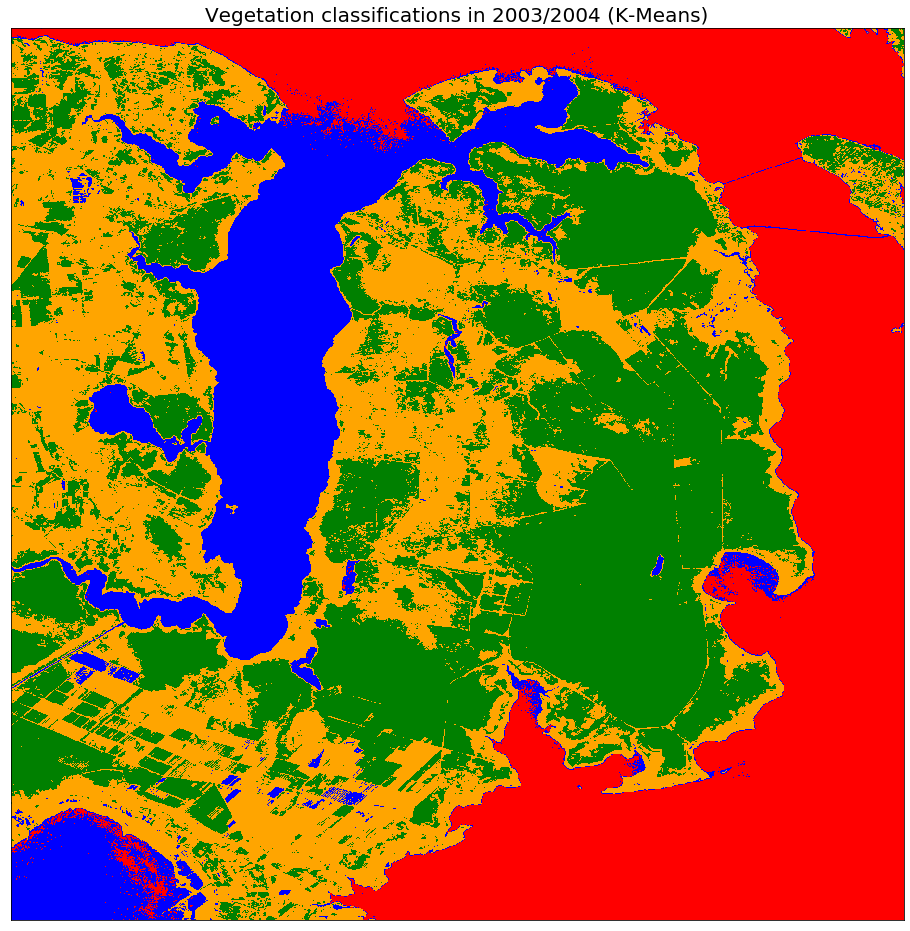

In [6]:
#Predict the clusters on all the data
clusters1 = model.predict(Xval1)
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
cmap = ListedColormap(['green','red', 'orange','blue'])
bounds = [0.5,1.5,2.5,3.5,4.5]
norm = BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(16,28))
plt.title('Vegetation classifications in 2003/2004 (K-Means)',fontsize=20)
plt.imshow(clusters1.reshape(data1['avgNDVI_5'].shape),cmap=cmap)
#plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()

Based on this figure, green pixels represent forest (cluster 1), red and blue pixels represent sea (clusters 2 and 4), orange pixels represent marsh (cluster 3). 

### 4.1.3 Determine important predictors using principal components analysis (PCA)

In [7]:
pca = sklearn.decomposition.PCA(n_components=11)
#Fit the model
pca.fit(Xns1)
#Print the explained variances
print(pca.explained_variance_)

[5.72000264e-01 3.00264101e-03 1.49862199e-03 1.21320930e-03
 2.05006465e-04 1.19111713e-04 8.51518163e-05 1.96029513e-05
 1.60145065e-05 2.11298929e-06 1.91916076e-06]


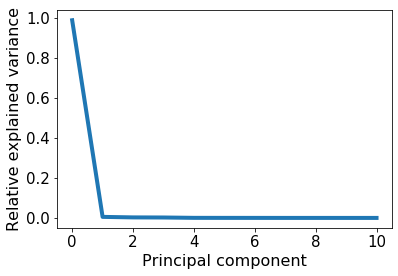

In [8]:
plt.plot(pca.explained_variance_/np.sum(pca.explained_variance_),lw=4)
plt.ylabel('Relative explained variance',fontsize=16)
plt.xlabel('Principal component',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

This means that only the first component "Average NDVI" matters.

### 4.1.4 Calculate the accuracy score of the model

In [9]:
# Accuarcy
res1 = clusters1.reshape(data1['avgNDVI_5'].shape)
right = 0
for i in range(len(row)):
    a = row[i]
    b = column[i]
    c = res1[a,b]
    if c == veg[i]:
        right += 1
print('Accuracy is:',right/len(veg))

Accuracy is: 0.16666666666666666


## 4.2 Vegetation classifications in 2016 (K-Means)

### 4.2.1 Run k-means on the April-July 2016 Landsat data

In [3]:
Xval2 = []
vars2 = ['avgNDVI_8','maxNDVI_8','minNDVI_8','avgEVI_8','maxEVI_8','minEVI_8','blue_8',
        'green_8','red_8','nir_8','swir_8']
for var in vars2:
    tmp = data2[var].reshape(data2[var].size)
    Xval2.append(tmp)
Xval2 = np.array(Xval2).T

In [4]:
# Unsupervised classification - K-mean
# n_clusters = 4
import sklearn.mixture
k = 4
model = sklearn.cluster.KMeans(n_clusters=k)
#Subsample data to fit the model (minimize computation)
idx2 = np.random.choice(np.arange(Xval2.shape[0]),1000000)
Xns2 = Xval2[idx2,:]
model.fit(Xns2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 4.2.2 Make the vegetation classifications in 2016

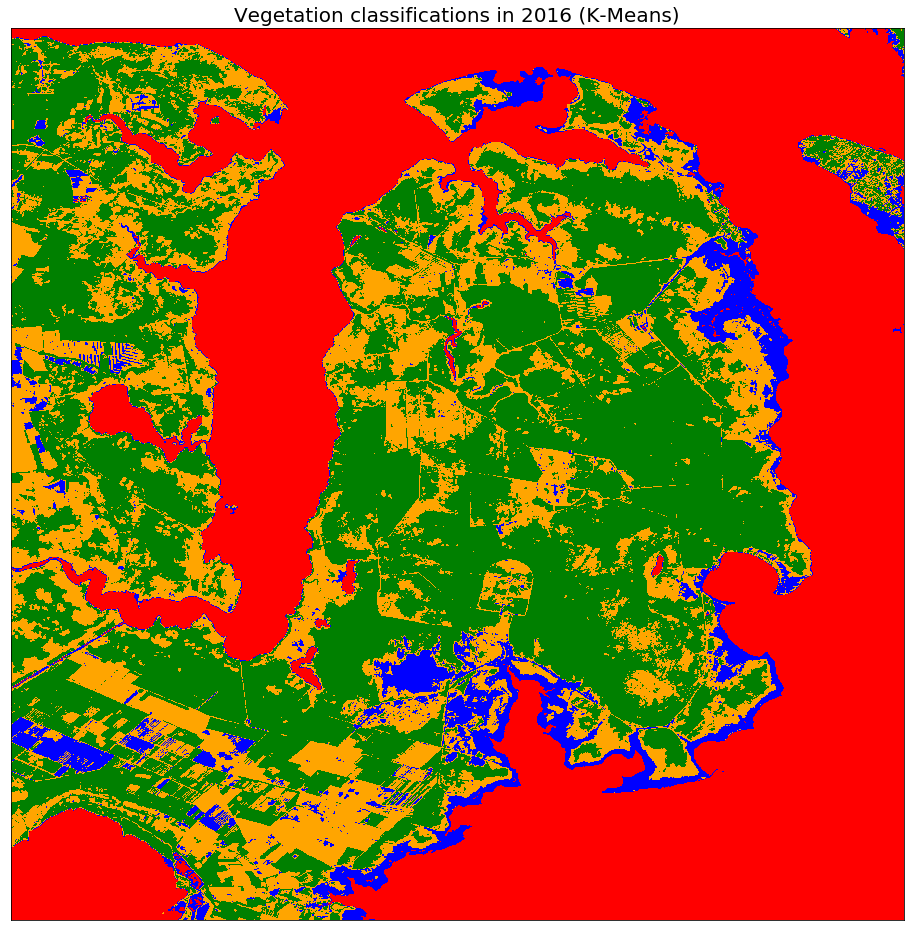

In [5]:
#Predict the clusters on all the data
clusters2 = model.predict(Xval2)
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
cmap = ListedColormap(['green','red', 'orange','blue'])
bounds = [0.5,1.5,2.5,3.5,4.5]
norm = BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(16,28))
plt.title('Vegetation classifications in 2016 (K-Means)',fontsize=20)
plt.imshow(clusters2.reshape(data2['avgNDVI_8'].shape),cmap=cmap)
#plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()

Based on this figure, green pixels represent forest (cluster 1), red pixels represent sea (clusters 2), orange pixels represent transitional forest (cluster 3), and blue pixels represent marsh (cluster 4). 

### 4.2.3 Determine important predictors using PCA

In [6]:
pca = sklearn.decomposition.PCA(n_components=11)
#Fit the model
pca.fit(Xns2)
#Print the explained variances
print(pca.explained_variance_)

[8.32960995e-01 1.36777988e-02 3.78057579e-03 1.52747099e-03
 1.05751339e-03 7.28199411e-04 1.68464438e-04 9.54555070e-05
 1.86326065e-05 4.48901374e-06 2.14692498e-06]


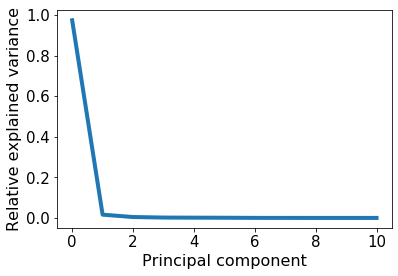

In [7]:
plt.plot(pca.explained_variance_/np.sum(pca.explained_variance_),lw=4)
plt.ylabel('Relative explained variance',fontsize=16)
plt.xlabel('Principal component',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 4.2.4 Calculate the accuracy score of the model

In [8]:
# Accuarcy
res2 = clusters2.reshape(data2['avgNDVI_8'].shape)
right = 0
for i in range(len(row)):
    a = row[i]
    b = column[i]
    c = res2[a,b]
    d = veg[i]
    if (c == 1) and (d == 1):
        right += 1
    elif (c == 2) and (d == 4):
        right += 1
    elif (c == 3) and (d == 2):
        right += 1
    elif (c == 4) and (d == 3):
        right += 1
print('Accuracy is:',right/len(veg))

Accuracy is: 0.08333333333333333


# 5. Run the supervised classification algorithm (Random Forest) and map the vegetation classes

In [3]:
# X1 = ['avgNDVI_5','maxNDVI_5','minNDVI_5','avgEVI_5','maxNDVI_5','minNDVI_5','blue_5','green_5','red_5','nir_5','swir_5']
# X2 = ['avgNDVI_8','maxNDVI_8','minNDVI_8','avgEVI_8','maxNDVI_8','minNDVI_8','blue_8','green_8','red_8','nir_8','swir_8']
X1 = []
X2 = []
for i in range(len(row)):
    a = row[i]
    b = column[i]
    avgNDVI1 = data1['avgNDVI_5'][a,b]
    maxNDVI1 = data1['maxNDVI_5'][a,b]
    minNDVI1 = data1['minNDVI_5'][a,b]
    avgEVI1 = data1['avgEVI_5'][a,b]
    maxEVI1 = data1['maxEVI_5'][a,b]
    minEVI1 = data1['minEVI_5'][a,b]
    blue1 = data1['blue_5'][a,b]
    green1 = data1['green_5'][a,b]
    red1 = data1['red_5'][a,b]
    nir1 = data1['nir_5'][a,b]
    swir1 = data1['swir_5'][a,b]
    avgNDVI2 = data2['avgNDVI_8'][a,b]
    maxNDVI2 = data2['maxNDVI_8'][a,b]
    minNDVI2 = data2['minNDVI_8'][a,b]
    avgEVI2 = data2['avgEVI_8'][a,b]
    maxEVI2 = data2['maxEVI_8'][a,b]
    minEVI2 = data2['minEVI_8'][a,b]
    blue2 = data2['blue_8'][a,b]
    green2 = data2['green_8'][a,b]
    red2 = data2['red_8'][a,b]
    nir2 = data2['nir_8'][a,b]
    swir2 = data2['swir_8'][a,b]
    X1.append([avgNDVI1,maxNDVI1,minNDVI1,avgEVI1,maxEVI1,minEVI1,blue1,green1,red1,nir1,swir1])
    X2.append([avgNDVI2,maxNDVI2,minNDVI2,avgEVI2,maxEVI2,minEVI2,blue2,green2,red2,nir2,swir2])
X1 = np.array(X1)
X2 = np.array(X2)
y = np.array(veg)
y = y.reshape(y.shape[0],1)

In [4]:
# Supervised classification - Random Forest
# split the measurement dataset into training dataset (70%) and test dataset (30%)
import sklearn.ensemble
nsamples = int(len(row) * 0.7)
idx = np.random.choice(y.size,nsamples,replace=False)
m = np.zeros(y.size).astype(np.int)
m[idx] = 1
m = m.astype(np.bool)
#Divide into training and validation
Xt1 = X1[m,:]
Xt2 = X2[m,:]
yt = y[m]
Xv1 = X1[~m,:]
Xv2 = X2[~m,:]
yv = y[~m]

## 5.1 November 2003-February 2004 field measurement data used to train the 2003/2004 model

### 5.1.1 Calculate the accuracy score of the model and determine important predictors

In [15]:
#Decision tree
clf = sklearn.ensemble.RandomForestClassifier(random_state = 1,n_estimators=100)
#Fit the tree
clf1 = clf.fit(Xt1,yt)
#Return the accuracy score
print('Accuracy score for the training dataset is',clf1.score(Xt1,yt))
print('Accuracy score for the test dataset is',clf1.score(Xv1,yv))
print(clf1.feature_importances_)

Accuracy score for the training dataset is 1.0
Accuracy score for the test dataset is 0.75
[0.09710518 0.15760828 0.15312402 0.12059716 0.10511837 0.09071043
 0.01637862 0.01359178 0.02761198 0.10085854 0.11729563]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Based on the feature importance values, the top two important variables are "maximum NDVI" and "minimum NDVI".

### 5.1.2 Make the vegetation classifications in 2003/2004

In [16]:
Xval1 = []
vars1 = ['avgNDVI_5','maxNDVI_5','minNDVI_5','avgEVI_5','maxEVI_5','minEVI_5','blue_5',
        'green_5','red_5','nir_5','swir_5']
for var in vars1:
    tmp = data1[var].reshape(data1[var].size)
    Xval1.append(tmp)
Xval1 = np.array(Xval1).T
Ypred1 = clf1.predict(Xval1)

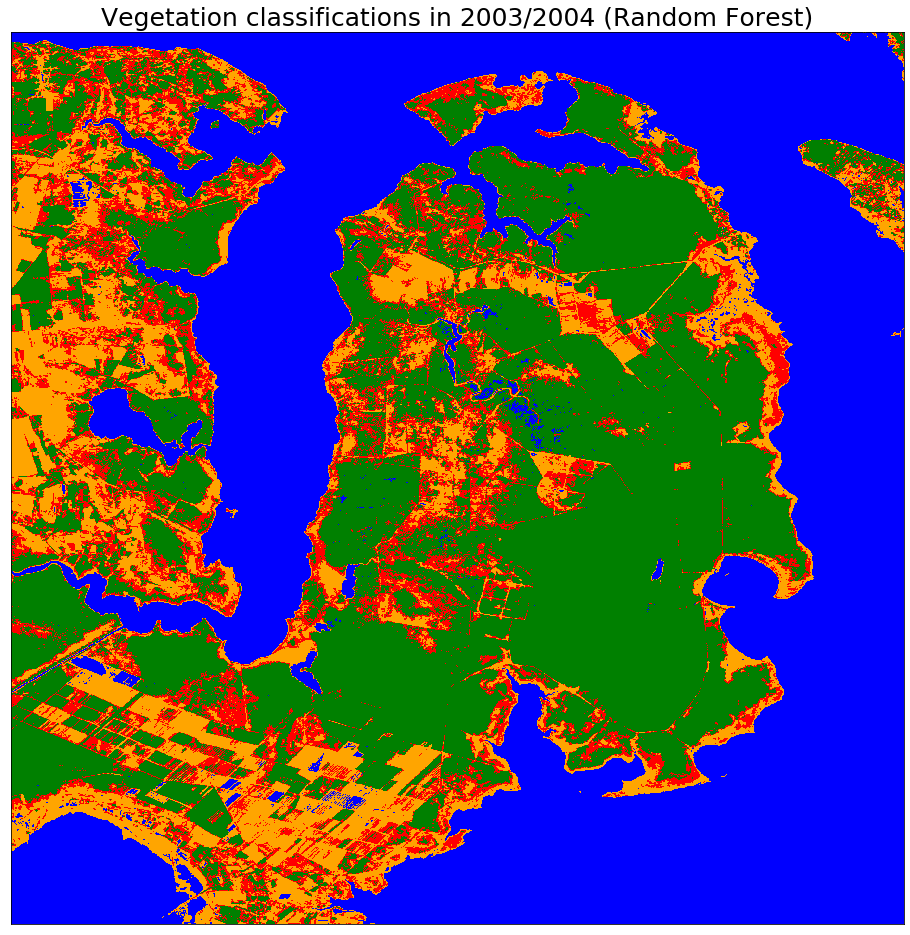

In [17]:
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
cmap = ListedColormap(['green','red', 'orange','blue'])
bounds = [0.5,1.5,2.5,3.5,4.5]
norm = BoundaryNorm(bounds, cmap.N)
#Make the figure to compare the original to the reproduced
plt.figure(figsize=(16,28))
plt.title('Vegetation classifications in 2003/2004 (Random Forest)',fontsize=25)
plt.imshow(Ypred1.reshape(data1['avgNDVI_5'].shape),cmap=cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
vegetation1 = Ypred1.reshape(data1['avgNDVI_5'].shape)
np.save('./vegetation_type1.npy',vegetation1)

## 5.2 April-July 2016 field measurement data used to train the 2016 model

### 5.2.1 Calculate the accuracy score of the model and determine important predictors

In [5]:
#Decision tree
clf = sklearn.ensemble.RandomForestClassifier(random_state = 1,n_estimators=100)
clf2 = clf.fit(Xt2,yt)
print('Accuracy score for the training dataset is',clf2.score(Xt2,yt))
print('Accuracy score for the test dataset is',clf2.score(Xv2,yv))
print(clf2.feature_importances_)

Accuracy score for the training dataset is 1.0
Accuracy score for the test dataset is 0.75
[0.12501766 0.16508646 0.12351979 0.12079514 0.08020178 0.08861973
 0.06350856 0.03105355 0.04701525 0.09481098 0.0603711 ]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Based on the feature importance values, the top two important variables are "maximum NDVI" and "minimum NDVI".

### 5.2.2 Make the vegetation classifications in 2016

In [6]:
Xval2 = []
vars2 = ['avgNDVI_8','maxNDVI_8','minNDVI_8','avgEVI_8','maxEVI_8','minEVI_8','blue_8',
        'green_8','red_8','nir_8','swir_8']
for var in vars2:
    tmp = data2[var].reshape(data2[var].size)
    Xval2.append(tmp)
Xval2 = np.array(Xval2).T
Ypred2 = clf2.predict(Xval2)

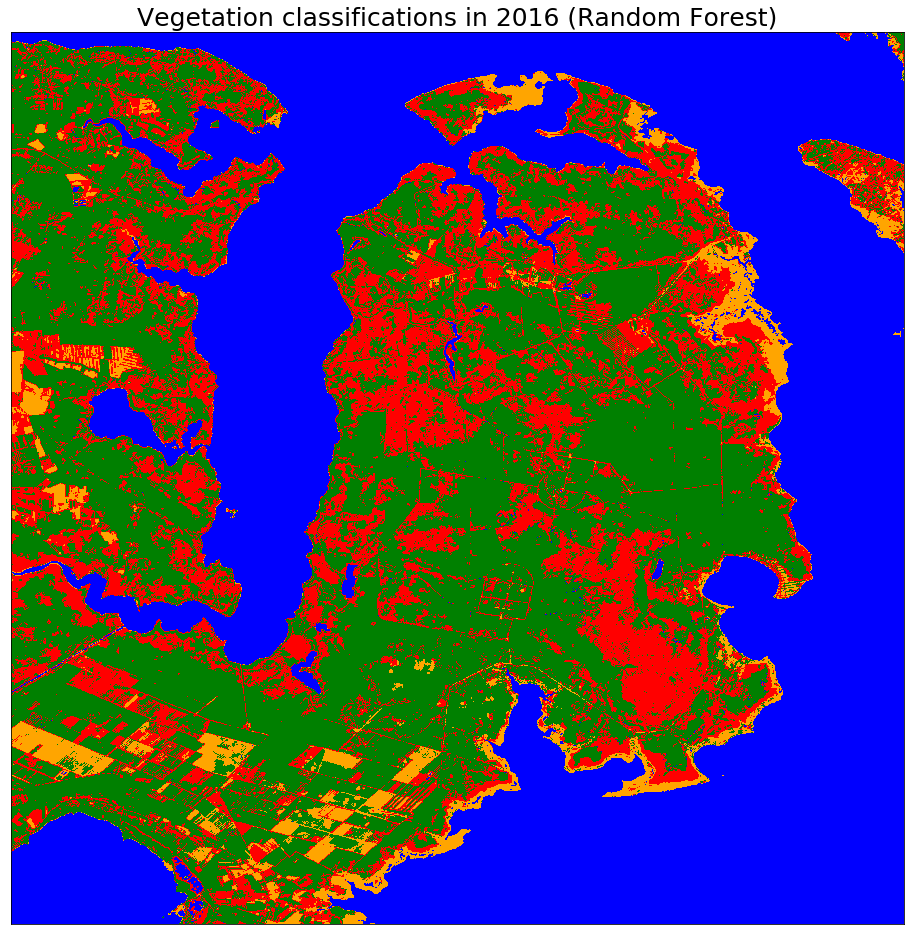

In [7]:
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
cmap = ListedColormap(['green','red', 'orange','blue'])
bounds = [0.5,1.5,2.5,3.5,4.5]
norm = BoundaryNorm(bounds, cmap.N)
#Make the figure to compare the original to the reproduced
plt.figure(figsize=(16,28))
plt.title('Vegetation classifications in 2016 (Random Forest)',fontsize=25)
plt.imshow(Ypred2.reshape(data2['avgNDVI_8'].shape),cmap=cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
vegetation2 = Ypred2.reshape(data2['avgNDVI_8'].shape)
np.save('./vegetation_type2.npy',vegetation2)

## 5.3 Vegetation type changes based on 2003/2004 random forest model and 2016 random forest model

In [11]:
vege1 = np.load('./vegetation_type1.npy')
vege2 = np.load('./vegetation_type2.npy')
change = np.zeros(shape=[vege2.shape[0], vege2.shape[1]])
for i in range(vege1.shape[0]):
    for j in range(vege1.shape[1]):
        change[i,j] = (vege1[i,j] - vege2[i,j]) * (vege1[i,j] + vege2[i,j])

In [12]:
change_code = np.zeros(shape=[change.shape[0], change.shape[1]])
for i in range(change.shape[0]):
    for j in range(change.shape[1]):
        if change[i,j] == 0:
            change_code[i,j] = 1 # No change
        elif change[i,j] == -3:
            change_code[i,j] = 2 # Forest to Transitional Forest
        elif change[i,j] == -8:
            change_code[i,j] = 3 # Forest to Marsh
        elif change[i,j] == -15:
            change_code[i,j] = 4 # Forest to Water Body
        elif change[i,j] == -5:
            change_code[i,j] = 5 # Transitional Forest to Marsh
        elif change[i,j] == -12:
            change_code[i,j] = 6 # Transitional Forest to Water Body
        elif change[i,j] == -7:
            change_code[i,j] = 7 # Marsh to Water Body
        elif change[i,j] == 7:
            change_code[i,j] = 8 # Water Body to Marsh
        elif change[i,j] == 12:
            change_code[i,j] = 9 # Water Body to Transitional Forest
        elif change[i,j] == 15:
            change_code[i,j] = 10 # Water Body to Forest
        elif change[i,j] == 5:
            change_code[i,j] = 11 # Marsh to Transitional Forest
        elif change[i,j] == 8:
            change_code[i,j] = 12 # Marsh to Forest
        elif change[i,j] == 3:
            change_code[i,j] = 13 # Transitional Forest to Forest

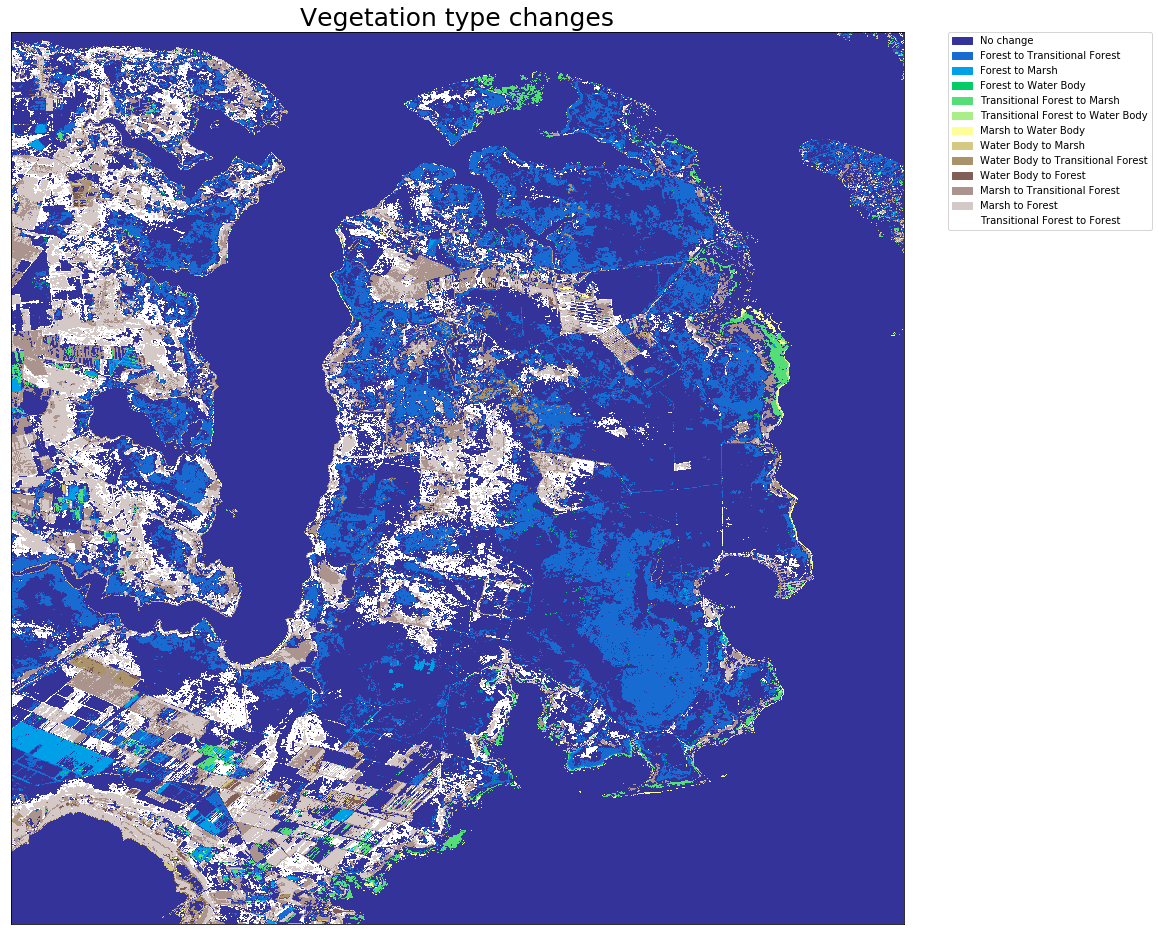

In [13]:
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#Make the figure to compare the original to the reproduced
plt.figure(figsize=(16,28))
plt.title('Vegetation type changes',fontsize=25)
values = np.unique(change_code.ravel())
im = plt.imshow(change_code,cmap=plt.get_cmap('terrain'))
plt.xticks([])
plt.yticks([])
# get the colors of the values, according to the 
# colormap used by imshow
colors = [im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
lables = ['No change', 'Forest to Transitional Forest','Forest to Marsh','Forest to Water Body','Transitional Forest to Marsh',
         'Transitional Forest to Water Body','Marsh to Water Body','Water Body to Marsh','Water Body to Transitional Forest',
          'Water Body to Forest','Marsh to Transitional Forest','Marsh to Forest','Transitional Forest to Forest']
patches = [mpatches.Patch(color=colors[i], label=lables[i]) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()

# 6. Compare the performance of supervised and unsupervised classification algorithms

The accuracy score of the 2003/2004 k-means model is 0.03333;  
The accuracy score of the 2016 k-means model is 0.09167;  
The accuracy score of the 2003/2004 random forest model is 0.86111;  
The accuracy score of the 2016 random forest model is 0.83333.  
Based on these accuracy scores, it is clear that the performances of random forest models are far better than those of k-means models, which indicates that the supervised classification algorithm (random forest) is more suitable for wetland degradation identification over the Alligator River National Wildlife Refuge, NC, USA.